In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.utils import shuffle

#load data from dataset    
from sklearn.datasets import load_digits
mnist = load_digits()
#print(mnist.data.shape)
X = mnist.data 
y = mnist.target

'''shuffle dataset'''
X,y = shuffle(X,y)

numFeatures = X.shape[1] # 64 features
numLabels = 10 # digits from 0 to 9

'''split up data into train and test set'''
all_data = X.size/64

'''m denotes the number of trainnig data '''
m=all_data*.6


X_train = X[0:int(m)]
y_train = y[0:int(m)]

X_test = X[int(m+1):int(all_data)]
y_test = y[int(m+1):int(all_data)]


In [41]:
'''logistic regression classifier'''
class logisticRegression:
        
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))

    def cost(self,theta, X, y):
        predictions = sigmoid(X @ theta)
        predictions[predictions == 1] = 0.999 # log(1)=0 causes error in division
        error = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions);
        return sum(error) / len(y);

    def cost_gradient(self,theta, X, y):
        predictions = sigmoid(X @ theta);
        return X.transpose() @ (predictions - y) / len(y)

    

In [42]:
'''create an array to store the model parameters %theta for each classifier. we need 10 sets of model parameters'''
classifiers = np.zeros(shape=(numLabels, numFeatures ))

In [50]:
'''train 10 binary classifiers targeted for each digit '''
model = logisticRegression()

for c in range(0, numLabels):
    label = (y_train == c).astype(int)
    initial_theta = np.zeros(X_train.shape[1])
    classifiers[c, :] = opt.fmin_cg(model.cost, initial_theta, model.cost_gradient, (X_train, label), disp=0)


''' Training set prediction and calculate Training Error '''
classProbabilities = model.sigmoid(X_train @ classifiers.transpose())
predictions_train = classProbabilities.argmax(axis=1)
print("Training accuracy:", str(100 * np.mean(predictions_train == y_train)) + "%")

''' Testing set prediction and calculate Testing Error '''    
classProbabilities = model.sigmoid(X_test @ classifiers.transpose())
predictions_test = classProbabilities.argmax(axis=1)
print("Testing accuracy:", str(100 * np.mean(predictions_test == y_test)) + "%")


Training accuracy: 100.0%
Testing accuracy: 94.15041782729804%


In [46]:
#Confusion matrix 
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, predictions_test))
confusion_matrix_A = confusion_matrix(y_test, predictions_test)

[[70  0  0  0  0  0  0  0  1  0]
 [ 0 68  0  0  1  0  0  0  6  2]
 [ 0  0 70  0  0  0  0  0  0  0]
 [ 0  0  0 70  0  1  0  0  1  0]
 [ 0  2  0  0 59  0  0  0  0  2]
 [ 0  1  1  0  0 81  0  1  2  2]
 [ 0  0  0  0  0  1 61  0  1  0]
 [ 0  1  0  1  0  0  0 72  1  1]
 [ 0  4  0  0  0  2  1  0 65  1]
 [ 0  2  1  0  0  0  0  0  2 60]]


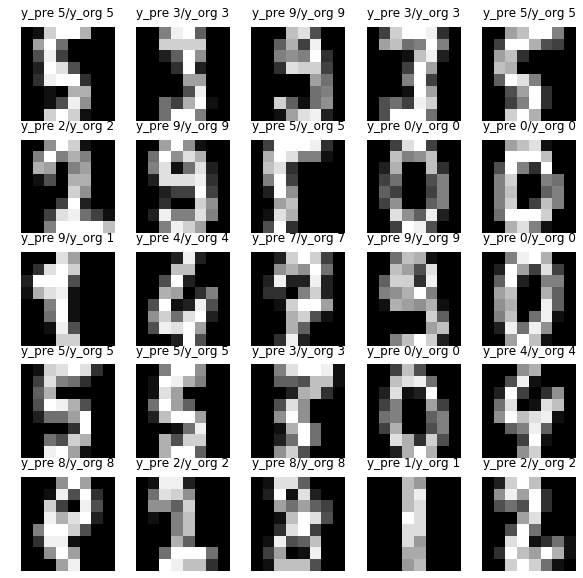

In [54]:
'''plot digit number images labeled by prediction value and original value'''
import random
#generate a list consist of 25 position in test part of  dataset
list= []
while len(list)<25:
    r=random.randint(int(m+1),int(all_data-1))
    if r not in list:list.append(r)


X_test_new = []
y_test_new = []
for k in list:
    X_test_new.append(mnist.data[k])
    y_test_new.append(mnist.target[k])
 
classProbabilities = model.sigmoid(X_test_new @ classifiers.transpose())
pred = classProbabilities.argmax(axis=1)

#pred = model.predict(X_test_new)        
nrows, ncols = 5, 5
fig, axes = plt.subplots(nrows, ncols,figsize=(10, 10))        
for i in range(nrows):
    for j in range(ncols):
        # Image index
        count = j + i * ncols
        k=list[count]
        ax = axes[i, j]
        ax.matshow(mnist.images[k, ...],
                   cmap=plt.cm.gray)
        ax.set_axis_off()
        ax.set_title("y_pre "+str(pred[count]) +"/y_org " +str(y_test_new[count]))

# comparsion
In terms of test data error, the two methods have almost the same performance, but in terms of speed, the KNN is slower than logistic regression.also, In term of train data error, logistic regression is better than KNN method. In term of confusion matrix, logistic regression is much better than KNN method.

# imbalanced learning 
  An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. The distribution can vary from a slight bias to a severe imbalance where there is one example in the minority class for hundreds, thousands, or millions of examples in the majority class or classes.
 
## 1.Resampling data
   changing the dataset that to be used to build  predictive model to have more balanced data.This change is called sampling dataset and there are two main methods that can be used to even-up the classes.first, adding copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement).after that, delete instances from the over represented class, called under-sampling.

## 2.different metrics
Try different metrics other than correct vs wrong prediction. Try Confusion Matrix or ROC curve. Accuracy is divided into sensitivity and specificity and models can be chosen based on the balance thresholds of the values.

## 3.  Anomaly Detection
Try Anomaly Detection techniques and models often used there. Although that would probably be necessary if your data was even more Imbalanced.